<a href="https://colab.research.google.com/github/vipulshah31120/Emp_promotion_prediction/blob/main/Emp_Prom_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Promotion Prediction**

### **Predicting whether an employee is promoted or not based on various factors**

The aim is to analyze the various factors that can contribute to the promotion of an employee. Based on the analysis, predict which employees will be promoted.

The following details for an employee is given in the dataset :-

1. Employee_Id - ID's of all Employees
2. Department - department of the employee.

2. Region - region as designated by the company

3. Education - qualification of the employee

4. Gender - gender of the employee

5. Recruitment channel - means via which employee was recruited

6. No of trainings - total number of trainings undergone by the employee

7. Age - age of the employee

8. Previous year ratings - previous year performance ratings of the employee

10. Length of service - total years worked for the company

11. KPIs met(1 if >80%) - total KPIs met in the tenure

12. Average training score - average score on trainings

13. Awards won - Awards won if any

14. is_promoted - Binary(0 = No | 1=Yes)

**The target column is the is_promoted column. The column is binary and
specifies whether the employee was promoted or not.**

In [ ]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_validate,validation_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from pandas.api.types import CategoricalDtype
import warnings

## **Data Collection**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/employeePromotion.csv')
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## **Data Exploration/Understanding**

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
df.shape

(54808, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
for col in df.columns:
  print('{} column has {} unique categories'.format(col, df[col].nunique()))

employee_id column has 54808 unique categories
department column has 9 unique categories
region column has 34 unique categories
education column has 3 unique categories
gender column has 2 unique categories
recruitment_channel column has 3 unique categories
no_of_trainings column has 10 unique categories
age column has 41 unique categories
previous_year_rating column has 5 unique categories
length_of_service column has 35 unique categories
KPIs_met >80% column has 2 unique categories
awards_won? column has 2 unique categories
avg_training_score column has 61 unique categories
is_promoted column has 2 unique categories


## **Exploratory Data Analysis**

## **Data Preprocessing**

 some column names will be changed for ease of access. The following column names have to change :-

*   KPIs_met >80%  ->  KPIs_met
*   awards_won?  ->  awards_won

In [ ]:
cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won',
       'avg_training_score', 'is_promoted']
df.columns = cols

In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

Only the **education** and **previous_year_rating** columns have Null values in them.

The **previous_year_rating** column gives the rating employee recieves each year on the Likert scale (here 1 to 5).

A new employee joining in the current year would not have a previous year rating, to prove this assumption, the previous year rating which are Null are compared to the **length_of_service** column which gives the number of years employee has now worked for the company.

The length of service has the minimum value of 1, this implies that any new joinee is also by default said to have worked for the company for one year.

In [ ]:
df.previous_year_rating.value_counts(dropna = False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [ ]:
service_filter = df[df.length_of_service == 1]
print("Null rating of employees having length of service of 1 Year: ", service_filter.previous_year_rating.isnull().sum())
print("Null rating of employees having length of service of 1 Year and Promoted: ", service_filter[service_filter.is_promoted == 1].previous_year_rating.isnull().sum())

Null rating of employees having length of service of 1 Year:  4124
Null rating of employees having length of service of 1 Year and Promoted:  339


So, out of 4124 employees 339 actually got promoted.

This reason makes a compelling arguement not to remove these rows.

In [ ]:
df.previous_year_rating.fillna(0, inplace = True)

Now we will check for **Education**

In [ ]:
df[df.education.isna()].is_promoted.value_counts()

AttributeError: 'DataFrame' object has no attribute 'education'

It is odd that the education column has so many Null values.

Qualifications mean a great deal and hence it is imperative the Null values are analyzed. Out of the total 2409 missing rows, 122 of those employees have recieved a promotion, thus the Null values have to be **imputed**.

One solution to impute the education column is to fill the Null values with the mode of the column. The mode of the column gives the qualification that is most frequent among the employees. The mode is a good option since during hiring process, the company looks into the employee's qualifications and hence recruits them. It can be assumed that every department has a different criterion for qualification, for example An engineer hired would mostly be a Bachelor's whereas an employee working in management would mostly be a Master's.
Analyzing the Department column based on the above argument, there are 9 unique departments in the company.

In [ ]:
depts = df.department.unique()
for dept in depts:
  edu = df[df.department == dept].education.mode()[0]
  print(dept, ":", edu)

Sales & Marketing : Bachelor's
Operations : Bachelor's
Technology : Bachelor's
Analytics : Bachelor's
R&D : Bachelor's
Procurement : Bachelor's
Finance : Bachelor's
HR : Bachelor's
Legal : Bachelor's


Hence simply filling the education with Bachelor's would suffice for the analysis.

In [ ]:
df.education = df.education.fillna(df.education.mode()[0])

In [ ]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met                    2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

The dataset seems clean with all the Null values removed.

The aim of the project is to **analyze which factors contribute to an employee's promotion.**

In [ ]:
num_cols = list(df.select_dtypes(['int', 'float']).columns)
num_cols

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met',
 'awards_won',
 'avg_training_score',
 'is_promoted']

columns under 'num_cols' are **continous**

In [ ]:
cat_cols = list([x for x in df.columns if x not in num_cols])
cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

cat_cols contains **categorical** values

## **Univariate Analysis**

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


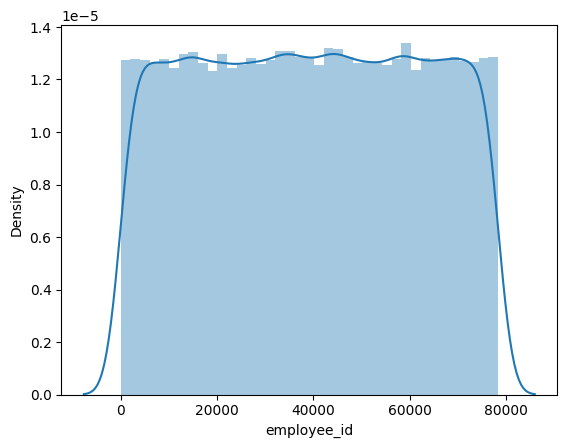

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


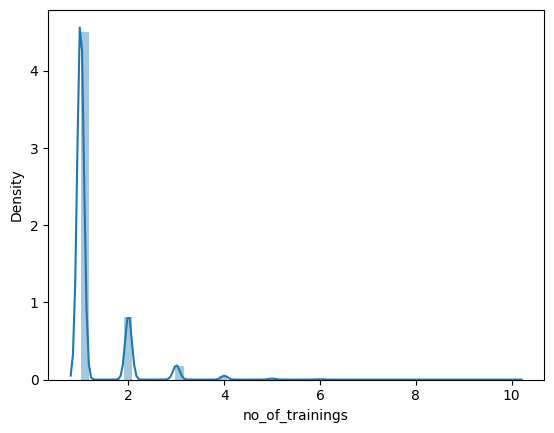

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


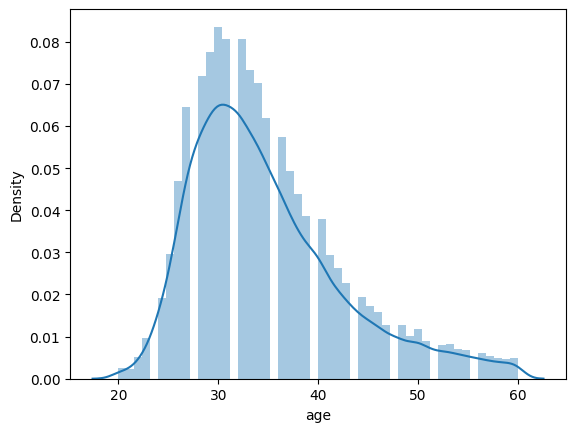

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


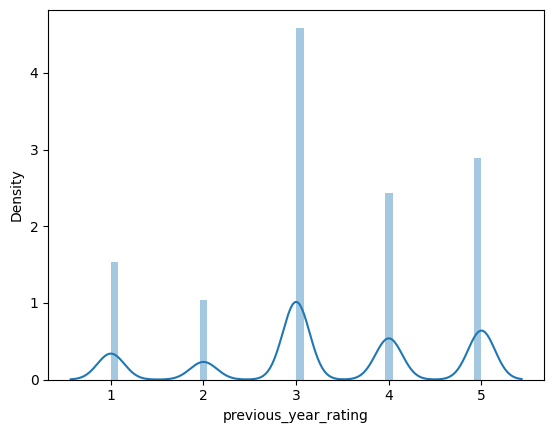

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


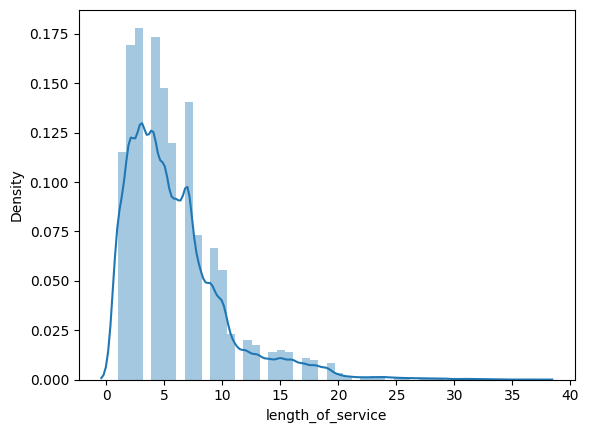

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


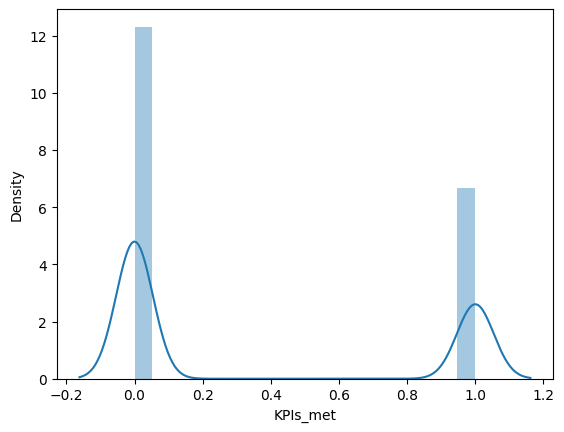

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


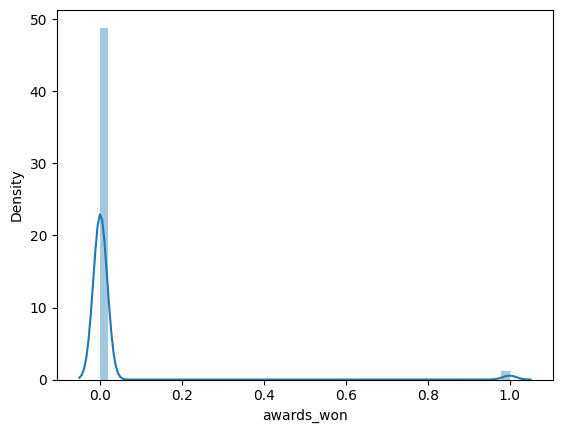

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


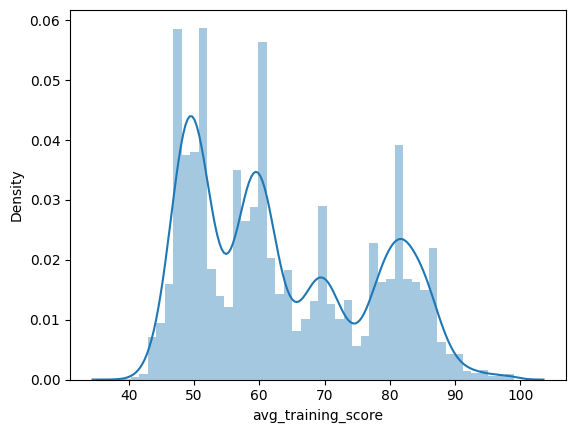

<ipython-input-14-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


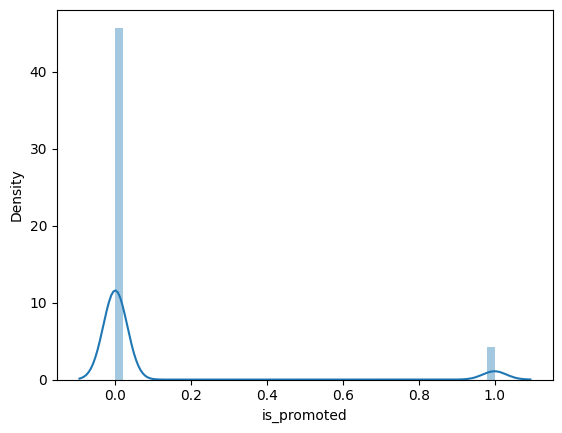

In [ ]:
for i in num_cols:
  sns.distplot(df[i])
  plt.show()



*   The age column is nearly uniformly distributed
*   Seems Average training score is not uniformly distributed
*   Same is the case with Length of Service.

**Will check using Box Plot**


<Axes: >

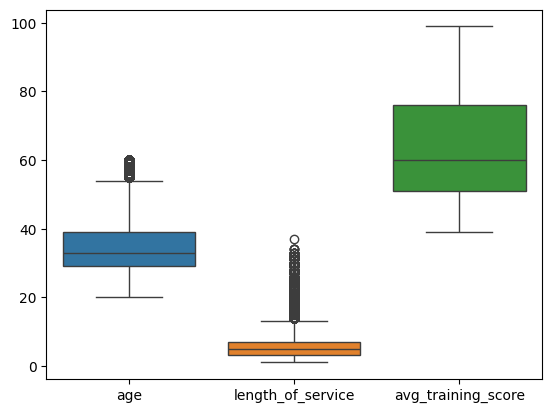

In [ ]:
box_plot_cols = ['age', 'length_of_service', 'avg_training_score']
sns.boxplot(data = df[box_plot_cols])

## **Treating Outliers**

Treating outliers for **Age** and **length_of_service** columns as **avg_training_score** has no outliers.

### **Using IQR**

In [ ]:
def treat_outliers(df, colname):
  q1, q3 = df[colname].quantile([0.25, 0.75])
  iqr = q3-q1
  min = q1-(1.5*iqr)
  max = q3+(1.5*iqr)
  return min, max

### **Trimming Outliers**

In [ ]:
lower, upper = treat_outliers(df, 'age')
df['age'] = np.where(df['age'] > upper, upper, df['age'])
df['age'] = np.where(df['age'] < lower, lower, df['age'])

In [ ]:
lower, upper = treat_outliers(df, 'length_of_service')
df['length_of_service'] = np.where(df['length_of_service'] > upper, upper, df['length_of_service'])
df['length_of_service'] = np.where(df['length_of_service'] < lower, lower, df['length_of_service'])

<Axes: >

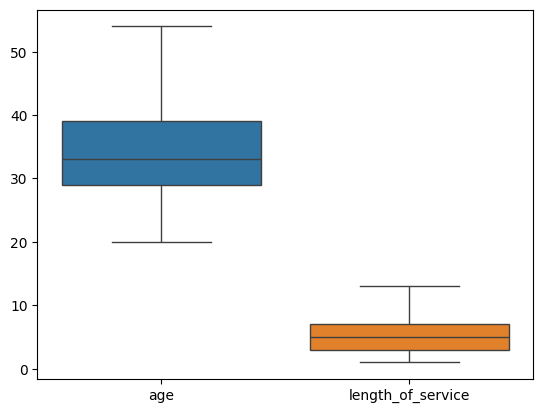

In [ ]:
box_plot_cols = ['age', 'length_of_service']
sns.boxplot(data = df[box_plot_cols])

Now the outliers has been resolved/treated

### **Multivariate Analysis**

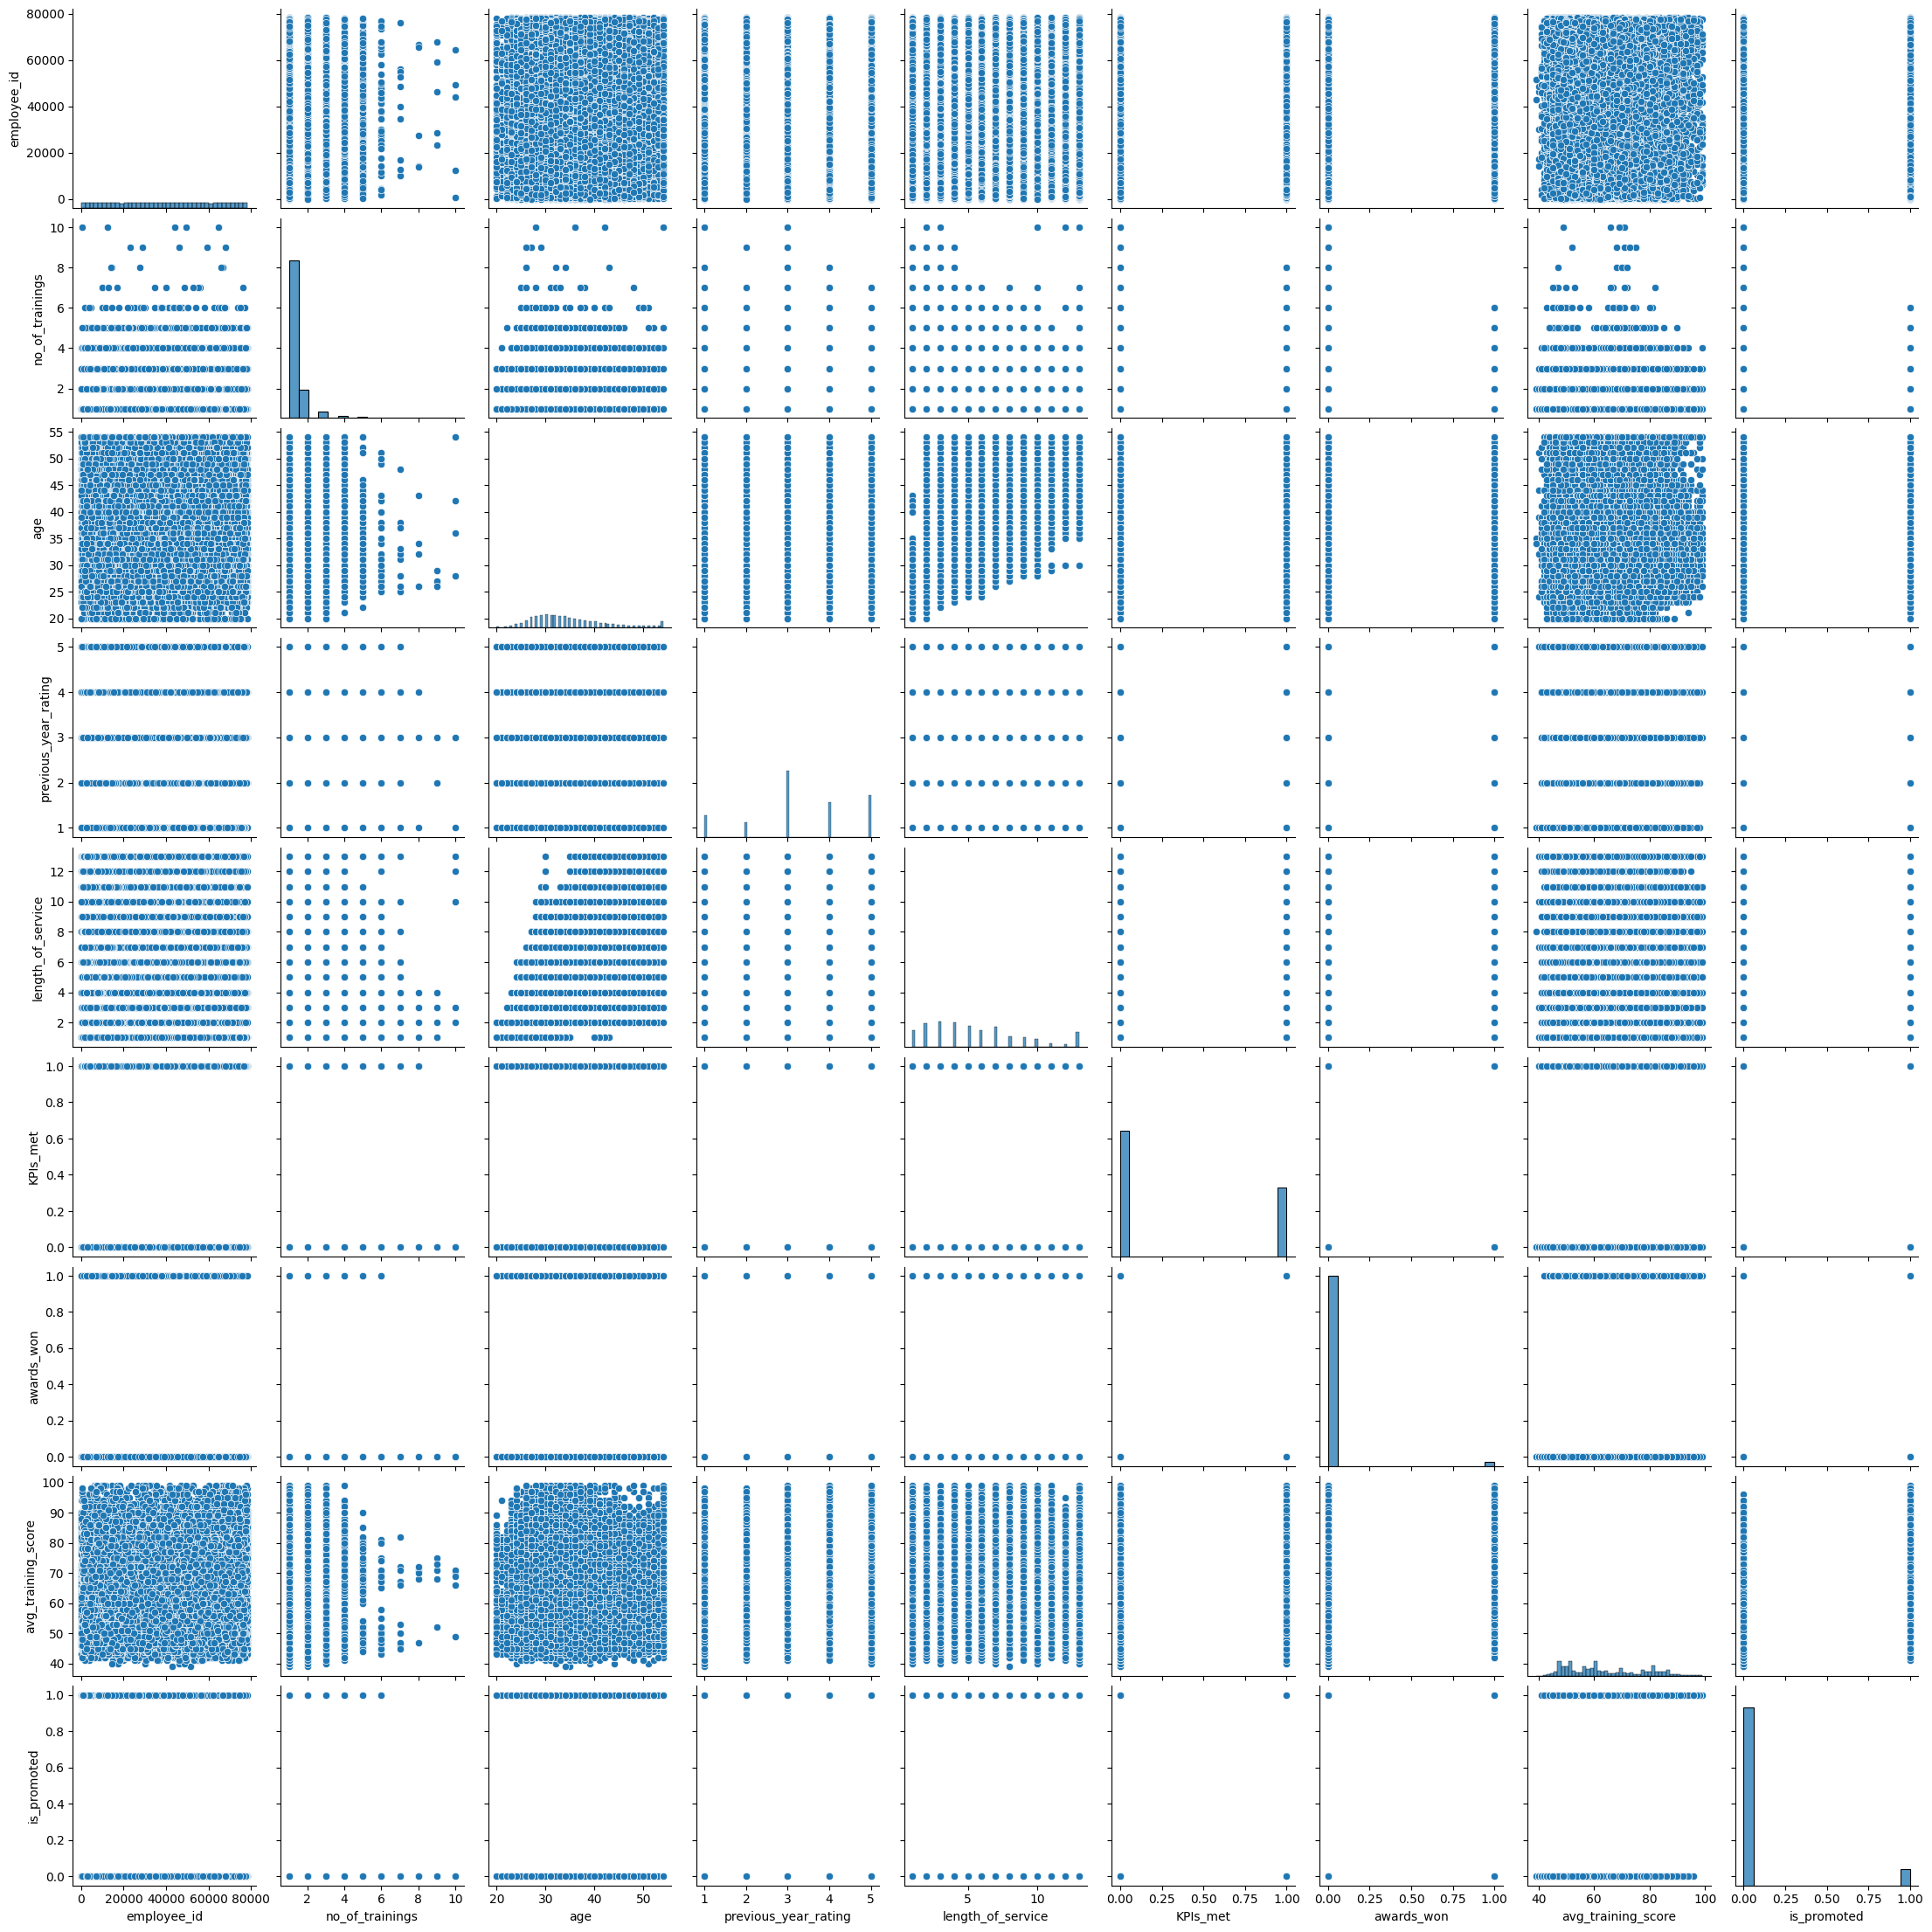

In [ ]:
sns.pairplot(df)
plt.show()

<ipython-input-20-2ed19e5b1d30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


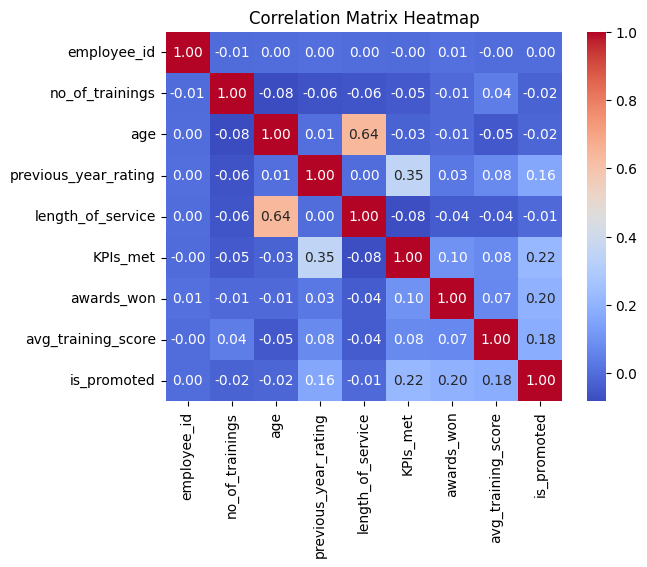

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.gender.value_counts(normalize=True)

m    0.702379
f    0.297621
Name: gender, dtype: float64

<ipython-input-22-ed78c5c92a8d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-22-ed78c5c92a8d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


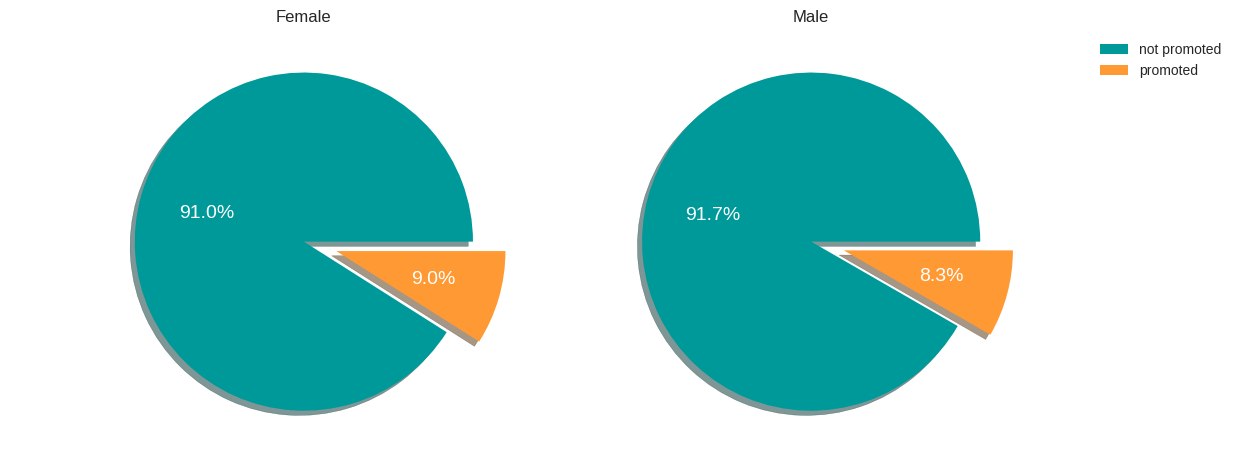

In [ ]:
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=df[df.gender=='f'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=df[df.gender=='m'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Male")
plt.legend(['not promoted','promoted'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

The columns no_of_trainings and avg_training_score specify the number of company organized workshops and trainings has the employee attended and the average training score the employee recieved for the said trainings. Trainings and workshops are integral for an employee as they are hosted for skill development of the employees. These trainings scores help the company understand which employees are improving. The two columns individually do not provide a good assessment since they cannot be compared between employees.

Say employee A scored an average training score of 60 but has attended only one workshop, and employee B achieves an average score of 50 but over 3 workshops. From the current perspective, employee A has a better score if the comparision is made on avg_training_score, but in reality, employee B has amassed a total of 150 training points whereas employee A has only 60.
Another case, employee A has undergone only 1 training session and recieved an average training score of 100. Employee B underwent 3 training sessions and recieved an average training score of 25. By comparision on no_of_trainings employee A trumps employee B. In reality employee A has a total score of 100 whereas employee B has just 75. Number of trainings can be less for a recently joined employee as compared to a veteran in the company.
The two above scenarios give rise to a third column - total_score, which gives an estimate of the total score recieved by an employee. This column is a good factor to compare and differentiate between employees who have shown improvement and those who havent.

In [ ]:
df['performance'] = df[['KPIs_met','awards_won']].any(axis=1,skipna=False)

### **Binning**

In [ ]:
df['total_score'] = df.no_of_trainings * df.avg_training_score
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49,0,True,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60,0,False,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7.0,0,0,50,0,False,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10.0,0,0,50,0,False,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2.0,0,0,73,0,False,73


The total_score column is on the ratio scale i.e. is numeric. The aim is to compare the total_score with the is_promoted column to identify if any relationships exist. For the purpose the total_score column is divided into 3 bins (categories) :-

Low - 65 or lower


Mediocre - 65 to 145 points


High - 145 or higher


The bins have been selected based on the distribution of the total_score column for the employees that were promoted. Using the pd.cut() functions the column is split into bins and stored in total_score_label column for further analysis.

In [ ]:
df['total_score_label'] = pd.cut(df.total_score,bins=[0,65,145,1000],labels=['Low','Mediocre','High'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49,0,True,49,Low
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60,0,False,60,Low
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7.0,0,0,50,0,False,50,Low
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10.0,0,0,50,0,False,100,Mediocre
4,48945,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2.0,0,0,73,0,False,73,Mediocre


Feature Scsaling **total_score_label**

In [ ]:
scores = df.pivot_table(values='is_promoted',index='total_score_label')
scores

,is_promoted
total_score_label,
Low,0.057549
Mediocre,0.117858
High,0.097444


<ipython-input-93-ba0518b35c6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.index, y=scores.is_promoted, palette=custom_palette)
<ipython-input-93-ba0518b35c6c>:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=scores.index, y=scores.is_promoted, palette=custom_palette)


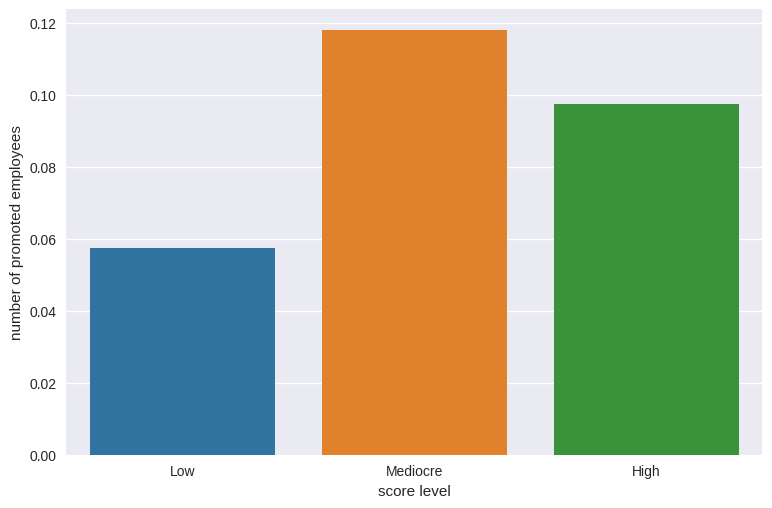

In [ ]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
sns.barplot(x=scores.index, y=scores.is_promoted, palette=custom_palette)
plt.ylabel('number of promoted employees')
plt.xlabel('score level')
plt.show()

The following conclusions can be drawn from the plot :-


*   Employees promoted have scores in the Mediocre and High range i.e. 65 and greater.
*   Employees with scores in the Low range have also been promoted a good percentage of times.
*   Mediocre score level having the highest percentage of promoted employees means total score is not the only criterion for promotion.

A similar approach is taken for the length_of_service column. An employee who has been in a company longer is more likely to be promoted rather than a new joinee. Since the column is numeric, it is converted to categorical via binning into the following categories.

*   New - 0 to 2 years
*   Established - 2 to 7 years
*   Experienced - 7 to 10 years
*   Veteran - 10 years or more

The categories have been chosen based on general trend. (Logic)

In [ ]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49,0,True,49,Low
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60,0,False,60,Low


In [ ]:
df['service_catg'] = pd.cut(
    df.length_of_service,
    bins=[0,2,7,10,37],
    labels=['New','Established','Experienced','Veteran']
)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49,0,True,49,Low,Experienced
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60,0,False,60,Low,Established
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7.0,0,0,50,0,False,50,Low,Established
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10.0,0,0,50,0,False,100,Mediocre,Experienced
4,48945,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2.0,0,0,73,0,False,73,Mediocre,New


In [ ]:
service = df.pivot_table(values='is_promoted',index='service_catg')
service

,is_promoted
service_catg,
New,0.086546
Established,0.084940
Experienced,0.091110
Veteran,0.075943


<ipython-input-97-801050a1f7fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service.index, y=service.is_promoted, palette=custom_palette)
<ipython-input-97-801050a1f7fb>:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=service.index, y=service.is_promoted, palette=custom_palette)


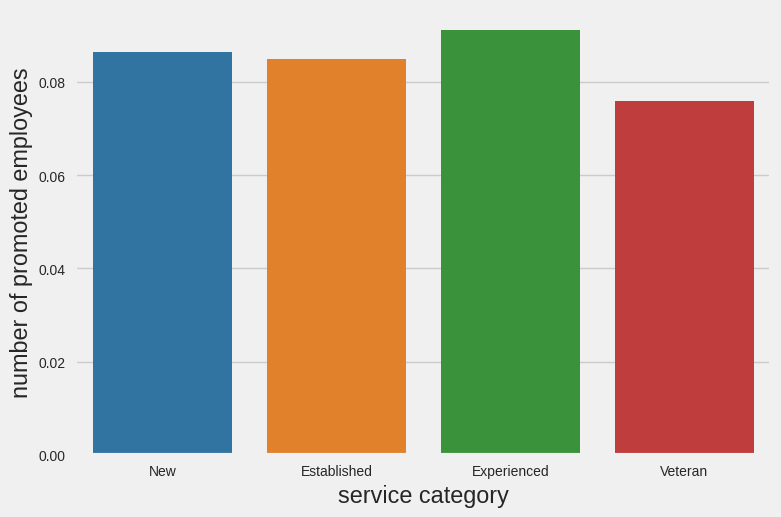

In [ ]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(12,8))
sns.barplot(x=service.index, y=service.is_promoted, palette=custom_palette)
plt.ylabel('number of promoted employees')
plt.xlabel('service category')
plt.show()

The plot above concludes that :-


*   Experienced employees are likely to get promoted than other categories, due to their experience and understanding of the company
*   New and Established employees have almost equal likelihood of getting promoted.
*   Veteran employees generally get less promotions. Due to their number of years given to the company, majority of them might have reached the pinnacle.


The **age** column is very similar to the **service length**, in terms that both define a temporal factor for the employee. The column is numeric. Assuming that an employee's career starts at the age of 20, and hence is binned into the following categories :-

Young - Less than 25 years

Middle - 25 to 40 years

Senior - 40 to 50 years

Elder - 50 years or older

On these categories, the percentage of people who were promoted from each category is calculated.

In [ ]:
df['age_label'] = pd.cut(df.age, bins=[0, 25, 40, 50, 100], labels = ['Young', 'Middle', 'Senior', 'Elder'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49,0,True,49,Low,Experienced,Middle
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60,0,False,60,Low,Established,Middle
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7.0,0,0,50,0,False,50,Low,Established,Middle
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10.0,0,0,50,0,False,100,Mediocre,Experienced,Middle
4,48945,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2.0,0,0,73,0,False,73,Mediocre,New,Senior


In [ ]:
ages = df.pivot_table(values='is_promoted',index='age_label')
ages

,is_promoted
age_label,
Young,0.066357
Middle,0.090173
Senior,0.072727
Elder,0.066971


The plot clearly states the following :-
*   An employee aged between 25 and 40 years is likely to be promoted.
*   A senior employee aged 40 to 50 years has a good chance of getting promoted.
*   A Middle aged or Senior employee form the perfect age interval (25 to 50) where an employee is said to at the peak of his/her career.
*   Younger or Elder employees have lesser chances of being promoted as the former has just begun their career and the latter is coming towards an end to their career.

The **service_catg** shows that a New employee is also likelier to get promoted. A New employee is not neccesarily a Young employee. Since **age_label** has been defined, this can be analyzed.

In [ ]:
new_emps = df[df.service_catg == 'New']

new_age = new_emps.pivot_table(values='is_promoted',index='age_label')
new_age

,is_promoted
age_label,
Young,0.066873
Middle,0.093564
Senior,0.084112
Elder,0.000000


<ipython-input-101-016f597464de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_age.index, y=new_age.is_promoted, palette=custom_palette)
<ipython-input-101-016f597464de>:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=new_age.index, y=new_age.is_promoted, palette=custom_palette)


Text(0.5, 0, 'age category')

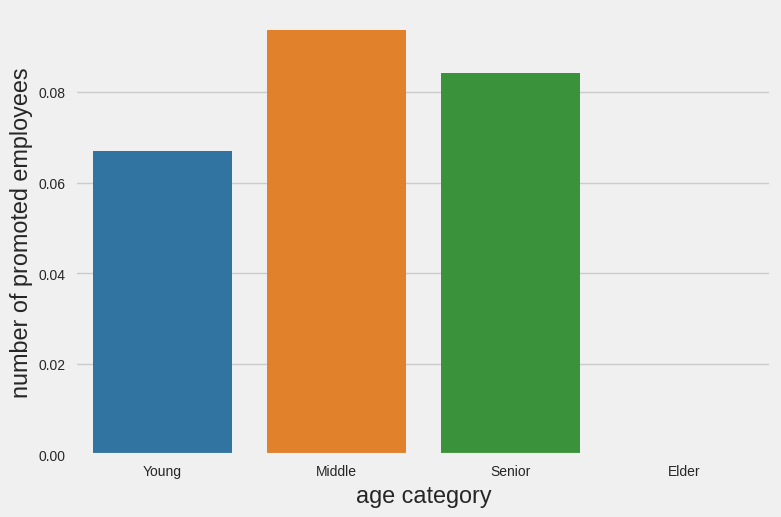

In [ ]:
plt.style.use('fivethirtyeight')
#.figure(figsize=(12,8))
sns.barplot(x=new_age.index, y=new_age.is_promoted, palette=custom_palette)
plt.ylabel('number of promoted employees')
plt.xlabel('age category')

The plot is conclusive of the facts :-

*   No elder employees are new joinees, this is due to the fact that their end of career is nearing.
*   Among the new joinees, the Middle aged and Senior employees are likelier to be promoted.
*   The Young employees being promoted, means there must be a few other factors discussed above, that must be great for them.

The **previous_year_rating** describes the rating an employee recieved in the internal evaluations of the company in the previous year. These ratings give a clear differentiation between employees. By intuition, an employee with a good rating paired with other factors is likelier to be promoted. To prove this hypothesis, the **previous_year_rating** column is first encoded into labels for understanding.

*   New - rating 0, new employee
*   Minimum - raitng 1
*   Fair - rating 2
*   Improving - rating 3
*   Good - rating 4
*   Very good - rating 5


In [ ]:
def decode(val):
    if val == 0:
        return 'New'
    elif val == 1:
        return 'Minimum'
    elif val == 2:
        return 'Fair'
    elif val == 3:
        return 'Improving'
    elif val == 4:
        return 'Good'
    elif val == 5:
      return 'Very Good'
    else:
        return 'New'

df['rating_label'] = df.previous_year_rating.apply(decode)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label,rating_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49,0,True,49,Low,Experienced,Middle,Very Good
1,65141,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60,0,False,60,Low,Established,Middle,Very Good
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7.0,0,0,50,0,False,50,Low,Established,Middle,Improving
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10.0,0,0,50,0,False,100,Mediocre,Experienced,Middle,Minimum
4,48945,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2.0,0,0,73,0,False,73,Mediocre,New,Senior,Improving


In [ ]:
ratings = df.pivot_table(values = 'is_promoted', index='rating_label')
ratings

,is_promoted
rating_label,
Fair,0.042840
Good,0.079376
Improving,0.072779
Minimum,0.014141
New,0.082202
Very Good,0.163615


<ipython-input-37-85259c60cf59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-37-85259c60cf59>:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(


Text(0.5, 0, 'ratings')

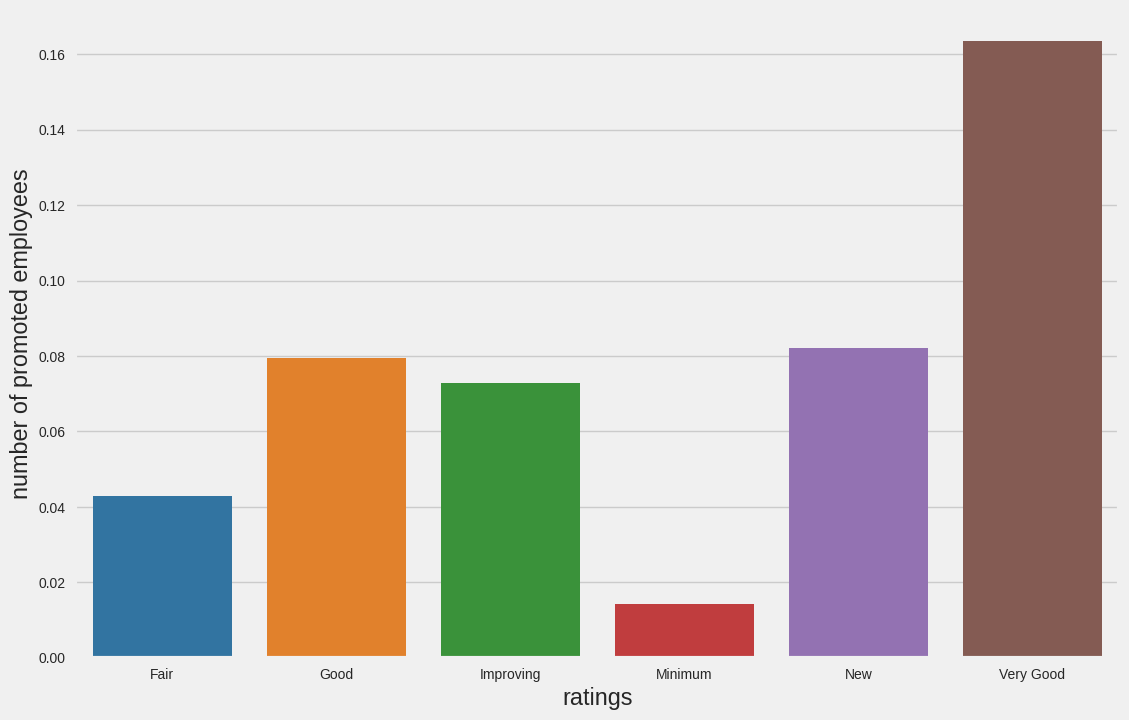

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ratings.index,
    y=ratings.is_promoted,
    palette=custom_palette
)
plt.ylabel('number of promoted employees')
plt.xlabel('ratings')

The plot proves the hypothesis coined earlier.

*   Employees with 'Very good' rating (5) are most likely to be promoted.
*   The trend in the number of people promoted is upwards from 'Minimum' to 'Very good' rating.
*   'New' (no previous year rating) employees shows good percentage of people being promoted. For these employees, other factors are dominant.



The last columns to analyze are the *department* and *education*. Intuitively the education of an employee is very important when recruiting, but once the employee has joined, the performance within the company is what should matter. Promotions happen within each departments, meaning a sales employee is promoted but stays in the sales department. This can be considered to generally true, with ofcourse a few exceptions. By these arguments, the two columns offer less inuition when analyzing which factors affect an employee's promotion.



<ipython-input-40-43f4f0e5f708>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-40-43f4f0e5f708>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,2,1)
<ipython-input-40-43f4f0e5f708>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,2,2)
<ipython-input-40-43f4f0e5f708>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed

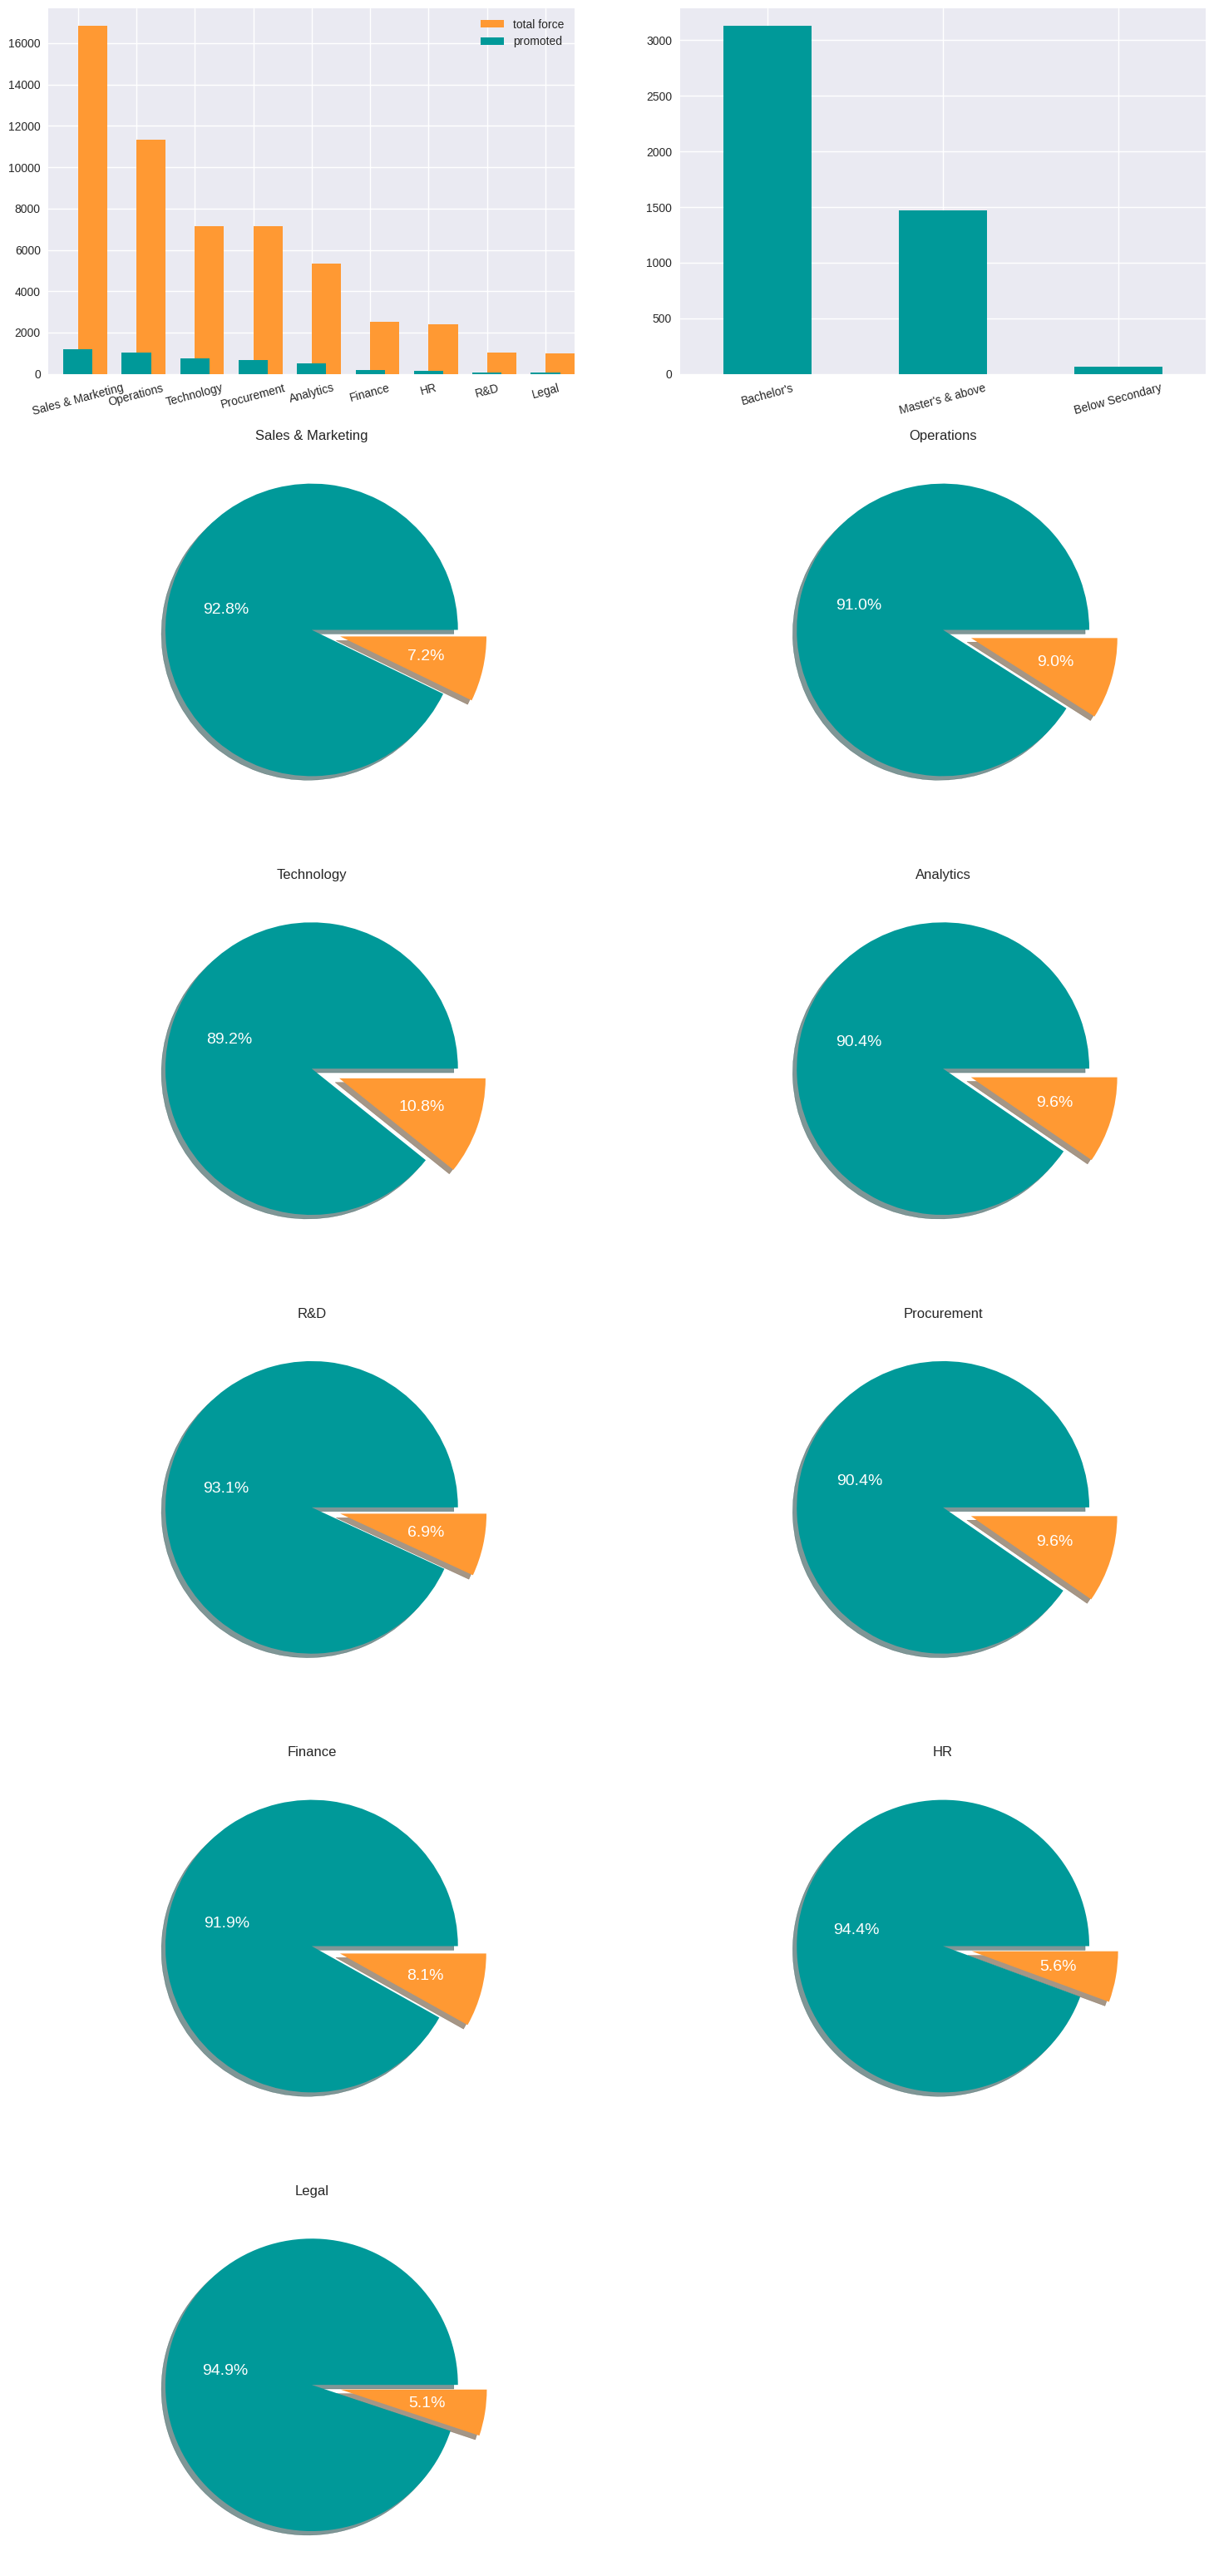

In [ ]:
plt.style.use('seaborn')
fig,ax = plt.subplots(2,2,figsize=(16,38))
plt.subplot(6,2,1)
df.department.value_counts().plot.bar(color='#ff9933',align='edge')
df[df.is_promoted == 1].department.value_counts().plot.bar(color='#009999',rot=15,align='center')
plt.legend(['total force','promoted'])
plt.subplot(6,2,2)
df[df.is_promoted == 1].education.value_counts().plot.bar(rot=15,color='#009999')

for ind,dept in enumerate(df.department.unique()):
    plt.subplot(6,2,ind+3)
    plt.title(dept)
    plt.pie(
        x=df[df.department==dept].is_promoted.value_counts(normalize=True),
        labels=['not promoted','promoted'],
        explode=[0,0.2],
        autopct="%1.1f%%",
        shadow=True,
        textprops=dict(color='w',fontsize=14),
        colors=['#009999','#ff9933']
    )

This concludes :-

*   The Sales & Marketing team has the highest number of promoted employees according to the bar plots, this can be because the Sales & Marketing team also has the highest total of employees.
*   From the promoted employees, most of them hold a Bachelor's qualification. Bachelor's qualification is also the most frequent in the data and hence this can be accounted for.
*   Across the different departments, the percentage of employees promoted are very close to each other.

These conclusions prove that department and education are indecisive when it comes to promotion.

The extensive analysis conducted, led to the following conclusions on this dataset :-

*   The performance column which is an amalgamation of KPIs_met and awards_won is a good factor to predict which employees get promoted, but it is not the only factor.
*   The average training score and the number of trainings attended combine to give the total training score. Employees with Mediocre or High score are likely to be promoted.
*   Gender as a factor has no effect on the promotions of the employee, both the genders had about equal percentages of representatives from the two sets.
*   The Age and Service categories give a temporal factor for the employees. Employees who are Middle aged and Established or Experienced have high chances of being promoted. The other categories within these proves that Age and Service length are not the only factors affecting promotion.
*   The most important factor amongst all is the previous year rating the employee recieved. The chances of promotions increase as the rating increases for an employee. New employees, that have 0 ratings also have a chance at promotion as, these ratings are not the only contributing factor.
*   Department and Education of an employee hardly gives much insight into which employee is likely to be promoted.

From the above conclusions, it can be said with confidence that no factor alone is responsible for the promotion of an employee. The following factors together can be considered for predictive modeling.


*   Performance
*   Age
*   Service Length
*   Previous year rating
*   total score








In [ ]:
rm_cols = [
    'employee_id',
    'department',
    'region',
    'education',
    'gender',
    'recruitment_channel',
    'KPIs_met',
    'awards_won',
    'total_score_label',
    'service_catg',
]

df.drop(rm_cols,axis=1,inplace=True)

KeyError: "['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'KPIs_met', 'awards_won', 'total_score_label', 'service_catg'] not found in axis"

In [ ]:
df.drop('age_label', axis=1, inplace= True)

In [ ]:
df.drop('rating_label', axis = 1, inplace = True)

In [ ]:
df.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,performance,total_score
0,1,35.0,5.0,8.0,49,0,True,49
1,1,30.0,5.0,4.0,60,0,False,60


The dataframe above is the final dataset with the factors that affect promotion. This will be now used for model building.
The performance column has to be converted to numeric bool.

In [ ]:
df.performance = df.performance.apply(lambda x: 1 if x else 0)

The dataset is scaled using the MinMaxScaler from the sklearn.preprocessing module. This way all columns are on the same scale. Before model building, the scaled dataset is split into Training set and Testing set with 80:20 ratio.

0    50140
1     4668
Name: is_promoted, dtype: int64


<Axes: ylabel='count'>

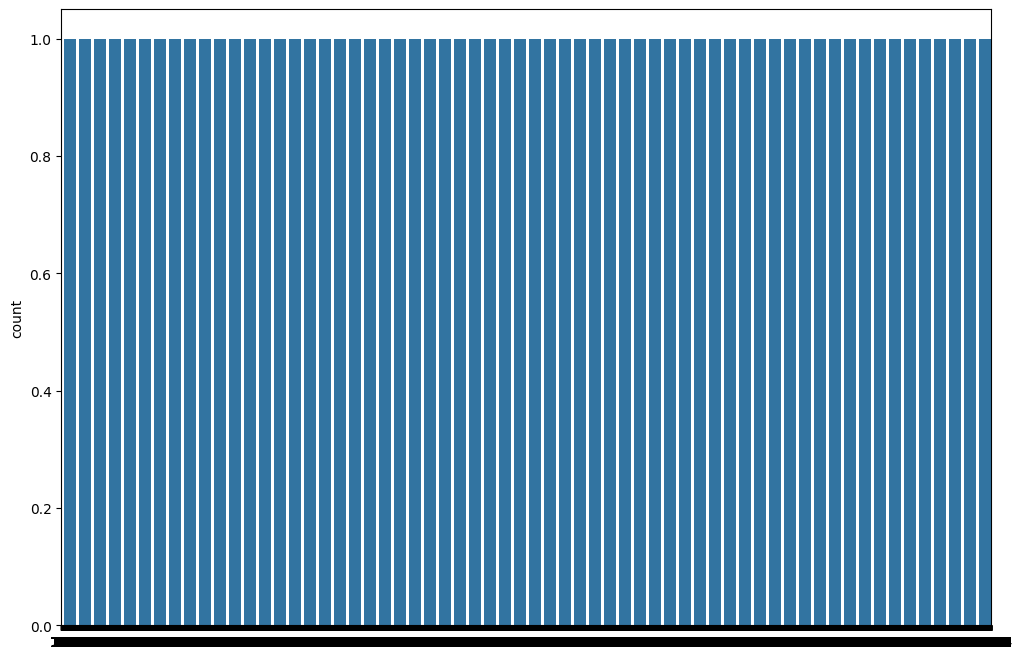

In [ ]:
print(df.is_promoted.value_counts())

plt.figure(figsize=(12,8))
sns.countplot(df.is_promoted)

The dataset has a huge imbalance in the target classes. Training a classifier on imbalanced classes can prove problems in precision and recall of the model. Depending on which class is lesser than the other :-

*   low recall + high precision : the model can’t detect the class well but is highly trustable when it does.
*   high recall + low precision : the class is well detected but the model also include points of other classes in it

To overcome this problem, two solutions are suggested. Either the dataset is undersampled to match the classes or the dataset is oversampled and the class with lesser representatives is increased. Undersampling can cause loss of data and in this case since class 1 has only 4668 data points, the total depth of the data would be reduced to around 9000. Effectively the model would lose 41000 data points. Oversampling seems like the better option. The function RandomOverSampler from imblearn.over_sampling module is used.



In [ ]:
X = df.drop('is_promoted',axis=1)
y = df.is_promoted


In [ ]:
print(X.head(25))

    no_of_trainings   age  previous_year_rating  length_of_service  \
0                 1  35.0                   5.0                8.0   
1                 1  30.0                   5.0                4.0   
2                 1  34.0                   3.0                7.0   
3                 2  39.0                   1.0               10.0   
4                 1  45.0                   3.0                2.0   
5                 2  31.0                   3.0                7.0   
6                 1  31.0                   3.0                5.0   
7                 1  33.0                   3.0                6.0   
8                 1  28.0                   4.0                5.0   
9                 1  32.0                   5.0                5.0   
10                1  30.0                   0.0                1.0   
11                1  35.0                   5.0                3.0   
12                1  49.0                   5.0                5.0   
13                2 

In [ ]:
cols = X.columns

In [ ]:
resampler = RandomOverSampler(random_state=1)


In [ ]:
X_res,y_res = resampler.fit_resample(X,y)

In [ ]:
print(X_res.shape)



(100280, 7)


In [ ]:
print(y_res.value_counts())

0    50140
1    50140
Name: is_promoted, dtype: int64


In [ ]:
scaler = MinMaxScaler()
X_res = pd.DataFrame(scaler.fit_transform(X_res))
X_res.head(5)

,0,1,2,3,4,5,6
0,0.000000,0.441176,1.0,0.583333,0.166667,1.0,0.014903
1,0.000000,0.294118,1.0,0.250000,0.350000,0.0,0.031297
2,0.000000,0.411765,0.6,0.500000,0.183333,0.0,0.016393
3,0.111111,0.558824,0.2,0.750000,0.183333,0.0,0.090909
4,0.000000,0.735294,0.6,0.083333,0.566667,0.0,0.050671


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=0)

Using the *sklearn.model_selection* *- cross_validate function*, the entire dataset will be cross-validated on the entire dataset to see how the model performs on this dataset. The cross validation gives a good method for model selection. The model which performs good on cross validation is then chosen for further training, testing and hyper-parameter tuning.

The ML model chosen here is *GradientBoostingClassifier*. This model is a good classification model and removes any biasness in the data. It is robust to over fitting. Since it uses ensemble techniques, various trees are used as predictors. One tree can develop bias, but the combination of outputs of many trees give a stable result.

In [ ]:
df.head(25)

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,performance,total_score
0,1,35.0,5.0,8.0,49,0,1,49
1,1,30.0,5.0,4.0,60,0,0,60
2,1,34.0,3.0,7.0,50,0,0,50
3,2,39.0,1.0,10.0,50,0,0,100
4,1,45.0,3.0,2.0,73,0,0,73
5,2,31.0,3.0,7.0,85,0,0,170
6,1,31.0,3.0,5.0,59,0,0,59
7,1,33.0,3.0,6.0,63,0,0,63
8,1,28.0,4.0,5.0,83,0,0,83
9,1,32.0,5.0,5.0,54,0,1,54


In [ ]:
scores = cross_validate(GradientBoostingClassifier(max_depth=10,random_state=0),X_res,y_res,cv=5,scoring=['accuracy','precision_macro','recall_macro','f1'],verbose=2, error_score='raise')

[CV] END .................................................... total time=  23.0s
[CV] END .................................................... total time=  21.5s
[CV] END .................................................... total time=  26.0s
[CV] END .................................................... total time=  22.9s
[CV] END .................................................... total time=  23.6s


In [ ]:
print('Avg Test score: ',np.mean(scores['test_accuracy']))
print('Avg Precision: ',np.mean(scores['test_precision_macro']))
print('Avg Recall: ',np.mean(scores['test_recall_macro']))
print('Avg F1 score: ',np.mean(scores['test_f1']))

Avg Test score:  0.8780115676106901
Avg Precision:  0.889822509417136
Avg Recall:  0.8780115676106901
Avg F1 score:  0.88778014432314


Cross-validation on the resampled dataset shows excellent results. The average Test set accuracy is about 87% with precision and recall around the same neighbourhood. f1 scores give a holistic view of the precision and recall, which is very good in this case, about 88%.

Thus it can be concluded that the GradientBoostingClassifier is a good predictor for this dataset.
The next step is hyper-parameter tuning. This tunes the parameters of the model to the best set that can maximize the accuracy of the model.

Letting the learning rate be fixed at 0.1, the max_depth of the trees (estimators) will be varied between 10 and 25 to get the optimal value. For this parameter a validation curve is made. The validation curve is a plot of the train and test accuracies vs a parameter under

In [ ]:
params = np.arange(10,26,1)
scores = validation_curve(
    GradientBoostingClassifier(),
    X_res,
    y_res,
    param_name='max_depth',
    param_range=params,
    scoring='accuracy',
    verbose=3,
    cv=3
)

[CV] END ......max_depth=10;, score=(train=0.905, test=0.876) total time=  18.4s
[CV] END ......max_depth=11;, score=(train=0.935, test=0.904) total time=  24.8s


KeyboardInterrupt: 

In [ ]:
train_scores = scores[0]
test_scores = scores[1]

train_means = np.mean(train_scores,axis=1)
test_means = np.mean(test_scores,axis=1)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.lineplot(x=params,y=train_means)
sns.lineplot(x=params,y=test_means)
plt.legend(['train score','validation score'])

The validation curve for the test accuracy identifies the optimal value of max_depth for classifier. In this case the max_depth value of 20 yields a average test accuracy of 94.94%. This accuracy is quite good and shows that the model has learnt the classes well and is highly trustable in its predictions.

The validation curve is intuitive when plotting for a single parameter. The GradientBoostingClassifier has many parameters such as learning_rate, max_depth, n_estimators etc.

When the best value for these have to be found together, GridSearchCV is used. For every combination of these parameters cross validation is performed. The combination giving the best score is returned along with the parameters in the combination.

In [ ]:
model = GradientBoostingClassifier(max_depth=20,random_state=0)
grid_vals ={
    'learning_rate':np.arange(0.1,0.5,0.1),
    'n_estimators':np.arange(100,500,100)
}
grid_mod = GridSearchCV(model,param_grid=grid_vals,cv=3,verbose=1)
grid_mod.fit(X_train,y_train)
print(grid_mod.best_params_)
print(grid_mod.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'learning_rate': 0.4, 'n_estimators': 300}
0.9411647387315517


After performing a *Grid search* the optimal paramters for the model are returned. Using these parameters, the model is finally trained on the train set and tested as well as make predictions on the test set. This model becomes the final output from the analysis.

In [ ]:
#Applying Gradient Boosting Classifier
model = GradientBoostingClassifier(learning_rate=0.4,n_estimators=300,max_depth=20,random_state=0)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

The above model does extremely well due to the hyper-paramter tuning executed on the model. The model gives the best fit possible with a test set accuracy of 95.7%. Generating a *classification_report* to gain more insights into the model.

In [ ]:
pred = model.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     11399
           1       1.00      0.92      0.96     13671

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070



The *classification_report* gives all the important metrics for a classifier. The model achieves a 100% precision and 92% recall on the test set. The model is now ready to predict which employees get promoted and which do not based on various factors. This concludes the project.